# Observed correlation function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Corrfunc
from Corrfunc.mocks.DDrppi_mocks import DDrppi_mocks
from Corrfunc.utils import convert_rp_pi_counts_to_wp
import healpy as hp

In [2]:
def unpack_catalog(catalog):
    return catalog['ra'], catalog['dec'], catalog['dist']

In [3]:
# Read the galaxy catalog
galaxy_catalog = np.load("../Data/sdss_cutoff.npy")
RA, DEC, dist = unpack_catalog(galaxy_catalog)
N = RA.size

# Read the supplied randoms catalog
random_catalog = np.load("../Data/randCat_matchnsa.npy")
rand_RA, rand_DEC, rand_Dist = unpack_catalog(random_catalog)
rand_N = rand_RA.size

# Setup the bins
nbins = 25
bins = np.logspace(-1, np.log10(30), nbins + 1)
pimax = 40.0

cosmology = 2
nthreads = 4

In [9]:
# Auto pair counts in DD
autocorr=1
DD_counts = DDrppi_mocks(autocorr, cosmology, nthreads, pimax,
                         bins, RA, DEC, dist, is_comoving_dist=True)

In [10]:
# Cross pair counts in DR
autocorr=0
DR_counts = DDrppi_mocks(autocorr, cosmology, nthreads, pimax, bins,
                        RA, DEC, dist, RA2=rand_RA, DEC2=rand_DEC, CZ2=rand_Dist,
                        is_comoving_dist=True)

In [11]:
# Auto pairs counts in RR
autocorr=1
RR_counts = DDrppi_mocks(autocorr, cosmology, nthreads, pimax, bins,
                         rand_RA, rand_DEC, rand_Dist, is_comoving_dist=True)

In [12]:
# All the pair counts are done, get the angular correlation function
wp = convert_rp_pi_counts_to_wp(N, N, rand_N, rand_N, DD_counts, DR_counts,
                                DR_counts, RR_counts, nbins, pimax)

In [13]:
def bin_centers(edges):
    cents = list()
    for i in range(len(edges)-1):
        cents.append((edges[i+1]+edges[i])/2)
    return np.array(cents)

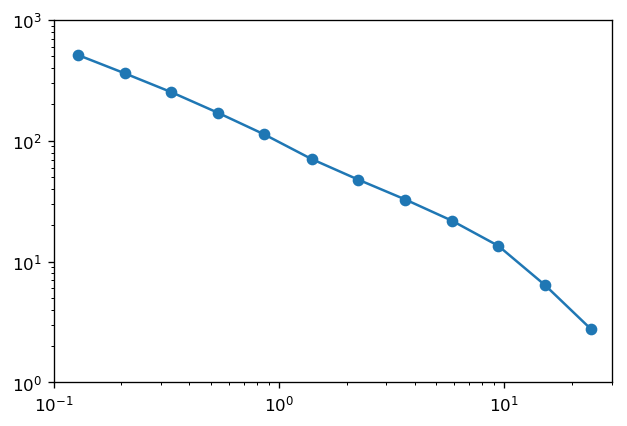

In [24]:
# Reddick data
xr = [0.128622422089606, 0.20684122410707673, 0.3326403703585226,
      0.5350139833477285, 0.8605779048945061, 1.3960874510643801,
      2.2454469597021176, 3.641545236724509, 5.857244150005106,
      9.42373420397281, 15.176488599849602, 24.246492585165885]
yr = [512.3677407071057, 362.09840110670876, 253.06986529591367,
        171.06503647200338, 113.08892361578259, 70.7141679268513,
        47.79992948330511, 32.67094059733128, 21.83994077255245,
        13.505922697186861, 6.395183522903948, 2.7704555569535207]

plt.figure(dpi=120)
plt.loglog(xr, yr)
plt.scatter(xr, yr)
plt.ylim(ymin=1, ymax=1000)
plt.xlim(xmin=0.1, xmax=30)
plt.show()

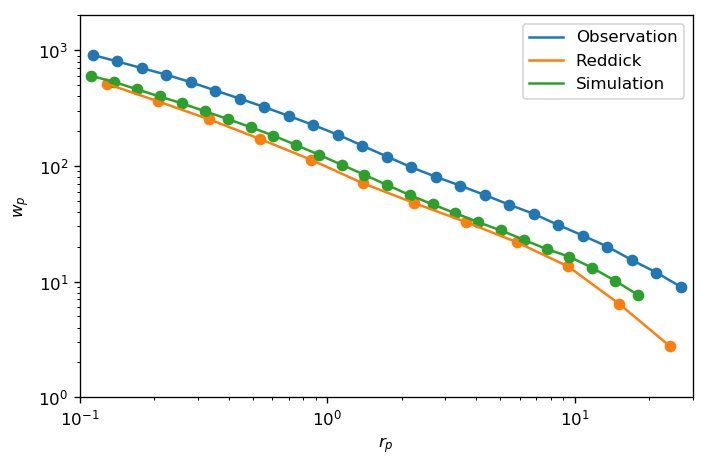

In [35]:
wp_sim = np.load("../Data/halocorr.npy")


x = bin_centers(bins)


plt.figure(dpi=120)
plt.loglog(x, wp, label='Observation')
plt.scatter(x, wp)
plt.loglog(xr, yr, label='Reddick')
plt.scatter(xr, yr)
plt.loglog(wp_sim['x'],wp_sim['wp'], label='Simulation')
plt.scatter(wp_sim['x'], wp_sim['wp'])
plt.ylim(ymin=1, ymax=2000)
plt.xlim(xmin=0.1, xmax=30)
plt.xlabel(r'$r_p$')
plt.ylabel(r'$w_p$')
# plt.ylim(ymax=10**3)
plt.legend()
plt.tight_layout()
plt.savefig("../Plots/CorrCompar.pdf")
plt.show()

In [15]:
x, wp

(array([  0.11281377,   0.14172516,   0.17804583,   0.2236746 ,
          0.28099689,   0.35300947,   0.44347711,   0.55712938,
          0.69990793,   0.8792771 ,   1.10461417,   1.3876996 ,
          1.74333284,   2.19010614,   2.75137643,   3.45648648,
          4.34229888,   5.45512319,   6.85313699,   8.6094273 ,
         10.81581159,  13.58763786,  17.06981498,  21.44438837,  26.94005724]),
 array([ 912.23258322,  800.69347801,  700.90365712,  615.46880742,
         529.23102303,  449.04928732,  381.72770091,  322.72844366,
         270.34352685,  225.68247308,  186.01922299,  149.70756075,
         120.57418391,   97.35160776,   80.49445177,   67.45058178,
          55.94907714,   46.14186243,   38.44244521,   30.79346436,
          24.98485405,   20.03279907,   15.33100661,   11.95873441,
           8.98583292]))

In [16]:
wp_sim['wp']

array([ 601.12823287,  533.03510943,  460.20538517,  398.74503812,
        347.09916425,  296.51496543,  254.39050846,  216.38661988,
        182.7430273 ,  151.73921785,  124.87083259,  102.38793177,
         83.85539911,   68.28794327,   55.90543405,   46.39381542,
         39.00333924,   32.59777784,   27.66792927,   23.00735069,
         19.10956001,   16.40297866,   13.16226326,   10.18751961,
          7.69777106])